# Python for Data Analysis (Notes-1)

## Overview
- Chpt. 1: Preliminaries
- Chpt. 2-3: Python Language Basics, Built-in Data Structures, Functions, Files
- Chpt. 4: NumPy Basics (Vectorized Computation)
- Chpt. 5: pandas
- Chpt. 6: Data Loading, Storage, File Formats
- Chpt. 7: Data Cleaning, Preparation
- Chpt. 8: Data Wrangling
- Chpt. 9: Data Visualization (Matplotlib, seaborn)
- Chpt. 10: Data Aggregation, Group Operations
- Chpt. 11: Time Series
- Chpt. 12: Advanced pandas
- Chpt. 13: Modeling Libraries (Patsy, statsmodels, scikit-learn)
- Chpt. 14: Case Study
- Appendix A.: Advanced NumPy

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Chpt. 2: Python Language Basics
- (p2) Python: **scripting language** -> can be used to quickly write small programs or scripts to automate other tasks
- (p3) Python: challenging language for building highly concurrent, multithreaded applications (esp. apps with CPU-bound threads) 
    - reason: **global interpreter lock (GIL)**, a mechanism prevents the interpreter from executing more than one Python instruction at a time
- (p5) pandas = _panel data_, python data analysis
- (p6) Ipython & Jupyter: encourages an _execute-explore_ workflow
- (p10) NOT update **conda** packages with **pip** -> environment problems
- (p14) **Syntactic sugar**
- (p23) object introspection with question mark ?
- (p28) **magic commands**: command-line programs to be run within IPython
- (p31) Everything is a _**Python object**_: each object has an associated _type_ and internal data 
- (p32,33) Assignment of a variable (bound variables) -> creating a **reference** -> _binding_: binding a name to an object
- (p33) object _references_ have no type associated
- (p34) **variables** are names for objects within a particular **namespace**, the type information is stored in the object itself.
- (p34) check if an object is an instance of a particular type using `isinstance` function
- (p35) Objects have **attributes** and **methods** -> accessed via `obj.attribute_name` or `getattr()`
- (p35) **duck typing**: check if an object has certain methods or behavior
- (p37) check if two references refer to the same object, use the `is` keyword or `is not`, `is` is not the same as `==` operator
- (p37) **Binary operators**
- (p39) **scalar types**: None, str(Unicode strings), bytes(raw ASCII bytes), float(double-precision), bool, int
- (p39) floor division operator: //
- (p38,40) Python strings and tuples are immutable
- (p41) backslash character `\` is an _escape character_, or preface the leading quote of the string with `r` (stands for _raw_)
- (p41) string objects -> `format` method:  substitute formatted arguments into the string, thereby producing a new string, {:.2f}, {:d}, {:s}
- (p42) Bytes and Unicode
- (p43) **Boolean** values are combined with `and` and `or` keywords
- (p44) **None**: null value type, common default value for function arguments, reserved keyword, a unique instance of `NoneType`
- (p44,45) `datetime`, `date`, `time` type
- (p49) ternary expression: `value = true-expr if condition else false-expr`



In [ ]:
# verify if an object is iterable if it implemented the iterator protocol
# which means it has a __iter__ 'magic method', alternative using `iter` function
def isiterable(obj):
    try:
        iter(obj) 
        return True
    except TypeError: # not iterable
        return False

# enable a function to accept any kind of sequence (list, tuple, ndarray)
# or even an iterator 
if not isinstance(x, list) and isiterable(x):
    x = list(x)

In [2]:
from datetime import datetime, date, time

dt = datetime(2011, 10, 29, 20, 30, 21)
print(dt.day)
print(dt.minute)
# extract date and time objects by calling methods on a datetime instance
print(dt.date())
print(dt.time())
# format a `datetime` as a string
print(dt.strftime('%m/%d/%Y %H:%M'))
# parse a string into `datetime` objects
print(datetime.strptime('20091031', '%Y%m%d'))
# before aggregating or grouping time series data
print(dt.replace(minute=0, second=0))


29
30
2011-10-29
20:30:21
10/29/2011 20:30
2009-10-31 00:00:00
2011-10-29 20:00:00


## Chpt. 3: Built-in Data Structures
- **Tuple** (p52-54)
    - convert any sequence or iterator to a tuple by invoking `tuple`: `tup = tuple('string')`
    - once tuple is created, it's not possible to modify which object is stored in each slot
    - if the object inside a tuple is mutable, the object can be modified in-place
    - concatenate tuples using `+` to produce a longer tuple
    - `(a, b)*n` create a longer tuple but with objects refered to the original one, not copies
    - syntax `*rest`: used in function signatures to capture an arbitrarily long list of positional arguments
    - use underscore `_` for unwanted variables: `a, b, *_ = vals`
    - useful method: `count`
    
- **List** (p54-61)
    - function `list()`: materialize an iterator or generator expression
    - method: `append(obj)`, `insert(idx, obj)` (computationally expensive, check `collections.deque`), `pop(idx)`, `remove(obj)`
    - check if a list contains a value using `in` keyword -> linear scan across list (slower than with _dict_, based on hash tables in constant time)
    - concatenating & combining: `+`(expensive due to copies) or `extend([some_list])`
    - sorting: 
        - in-place with `sort(key=lambda...)`
        - return a sorted copy with `sorted()`
    - Binary search with built-in `bisect` module: `bisect.bisect` finds and returns the location, `bisect.insort` insert the element into the location
    - `bisect` module functions should work on but do not check if the list is sorted, used with unsorted list may succeed without error but incorrect
    - slicing: indexing operator `[]`, takes in `start:stop:step`, `seq[::-1]` works as reverse the sequence
    - built-in sequence functions: `enumerate()`, `sorted`, `zip`, `reversed`
    
- **dict** (p61-65)
    - hash map, or associative array
    - same way to access, insert, set elements as list and tuple
    - delete values using `del` keyword or `pop` method
    - methods: 
        - `keys()`, `values()` return iterators of the dict's keys and values
        - merge one dict into another using `update()` -> in-place changes
    - create dict from sequences using dict comprehensions: `mapping = dict(zip(keys, values))`
    - default values:
        - `get`: `value = some_dict.get(key, default_value)`
        - `set_default`
        - `collections.default_dict`
    - _values_ can be any Python object
    - **hashability**
        - _keys_ have to be immutable objects like scalar types (int, float, string) or tuples
        - check if an object is hashable using `hash(obj)` function
        - convert a list to tuple in order to use it as a key: `d[tuple([1, 2, 3])]`
        
- **Set** (p65-67)
    - create a set: 1. `set` function, 2. _set literal_ with curly braces `{}`
    - set operations: union, intersection, difference, symmetric difference (may use binary operator `|` for union, `&` for intersection)
    - set elements should be immutable, list-like elements must be first converted into tuples
    - check if a set is a subset or superset of another set using `set_a.issubset(set_b)`, `set_a.issuperset(set_b)`
    
- List, Set, and Dict Comprehensions
    - `[expr for val in collection if condition]`
    - `dict_comp = {key-expr: value-expr for value in collection if condition}`
    - `set_comp = {expr for value in collection if condition}`

In [4]:
vals = 1, 2, 2, 4, 5, 3, 2 
a, b, *rest = vals
print(a, b)
print(rest)
print(vals)
print(vals.count(2))

1 2
[2, 4, 5, 3, 2]
(1, 2, 2, 4, 5, 3, 2)
3


In [5]:
gen = range(10)
print(gen)
print(list(gen))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
import bisect
c = [1, 2, 2, 2, 3, 4, 7]
print(bisect.bisect(c, 2), c)
print(bisect.insort(c, 6), c)

4 [1, 2, 2, 2, 3, 4, 7]
None [1, 2, 2, 2, 3, 4, 6, 7]


In [9]:
# use enumerate to compute a dict mapping the values (unique) of a sequence to their location
some_list = ['PEK', 'SH', 'GZ', 'SZ']
mapping = {}
for i, v in enumerate(some_list):
    mapping[v] = i
mapping

{'PEK': 0, 'SH': 1, 'GZ': 2, 'SZ': 3}

In [11]:
# use zip to unzip a sequence, similar as converting a list of rows into  a list of columns
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Schilling', 'Curt')]
first_names, last_names = zip(*pitchers)
print(first_names, last_names)

('Nolan', 'Roger', 'Schilling') ('Ryan', 'Clemens', 'Curt')


In [13]:
# dict: default values
# categorize a list of words by their first letters
words = ['apple', 'bat', 'bar', 'atom', 'book']
by_letter = {}
for word in words:
    letter = word[0]
    by_letter.setdefault(letter, []).append(word)
print(by_letter)

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}


In [15]:
# use collections.defaultdict
from collections import defaultdict
by_letter = defaultdict(list)
for word in words:
    by_letter[word[0]].append(word)
print(by_letter)

defaultdict(<class 'list'>, {'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']})


## Chpt. 3: Functions and Files
- (p70) **None** is returned automatically when there is no return statement 
- (p70) **keyword** arguments _must_ follow the **positional arguments** (if any)
- (p70) **namespace**: variable scope
- (p71) use too many `global` keyword -> maybe better to consider OOP
- (p72) **functions are objects**, can be used as arguments to other functions -> example below for cleaning strings
- (p73) anonymous/**lambda function** (never given an explicit \_\_name__ attribute) -> useful in cases where data transformation functions take functions as arguments
- (p74) Currying: derive new functions from existing ones by _partial argument application_
- (p75) iterator
- (p75) generator: to construct a new iterable object, pause after each returned value until the next one is requested
    - use `yield` keyword instead of `return`
    - generator expression: list comprehension within parentheses instead of brackets
        - can be used as function arguments, while list comprehension cannot
- (p76) **itertools** module: `itertools.groupby(iterabel[], keyfunc)`
- (p78) `try-except-else-finally` block:
    - catch multiple exception types by writing a tuple of exception types: `except (TypeError, ValueError):`
    - `finally`: always executes regardless of whether `try` block succeeds or not
    - `else`: only executes when `try` block succeeds
- (p79) use `%run script` in IPython by default print a full call stack trace (traceback)
    - `%mode Plain` or `%mode Verbose`: control the amount of contex
    - `%debug` or `%pdb%`: step into the stack after an error
- (p80) EOL(end-of-line) markers
- (p81,82) file method: `read([size])`, `readlines([size])`, `tell`, `seek(pos)`

- compare two approaches of string cleaning

In [16]:
# use regular expression to clean data
import re
def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip() # stripping whitespaces
        value = re.sub('[!#?]', '', value) # remove punctuation symbols
        value = value.title() # standardizing on proper capitalization
    return result

In [17]:
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

> The second approach is a more functional pattern, which enables to easily modify how the strings are transformed at a very high level. The `clean_strings` function is therefore more reusable and generic.

In [22]:
# generator
def squares(n=10):
    for i in range(1, n+1):
        yield i**2

gen = squares()
for x in gen:
    print(x, end=' ')

1 4 9 16 25 36 49 64 81 100 

In [23]:
# generator expression
gen = (x**2 for x in range(100))
sum(gen)

328350

In [ ]:
# file > get an EOL-free list of lines
with open(path) as f:
    lines = [x.rstrip() for x in f]

## Chpt. 4, Appendix A: NumPy
why NumPy?
- library of algorithms -> written in C -> operate on memory without type checking and other overhead.
- use much less memory than built-in Python sequences

... allows for:
- fast vectorized array operations
- common array algorithms: sorting, unique, set operations
- descriptive statistics -> aggregating/summarizing data
- data alignment, relational data manipulations (merging, joining)
- conditional logic -> array expressions
- group-wise data manipulations (aggregation, transformation, function application)

#### Fundamentals
- (p87) array object -> enables batch computations with similar syntax to scalar values on built-in Python objects
- (p88) ndarray: generic multidimensional container for **homogeneous** data (same type)
    - create: `np.array(data, dtype=np.int32)`
    - `dtype` (metadata object: data about data)
    - `ndim`, `shape`
    - convert or cast an array from one dtype to another: `arr.astype(np.float64)` -> always creates a new array   
- (p93) arithmetic operations b/t equal-size arrays -> **element-wise** (_**vectorization**_@p108: replacing explicit loops with array expression)
- (p93) arithmetic operations w/ scalars -> propagate (broadcast?) the scalar argument to each element in the array
- (p94) operations b/t differently sized arrays -> _broadcasting_ (see p460)
- (p94) array slices are **views** on the original array (not copy), modifications will be reflected in the source array
    - slicing a list will create a copy, with reference point to the original objects, but any modification done on the new list won't affect the old one
- (p98) assign to a slice expression assigns to the whole selection
- (p101) use `~` operator to invert a general condition -> boolean indexing -> always create a copy
- (p101) boolean arithmetic operators: `&`, `|` -> _**Python keywords `and` and `or` do not work with boolean arrays!!**_
- (p102) fancy indexing: indexing using integer arrays -> create a copy
- (p103) transpose: `transpose` method or `T` attribute -> return a view
    - color channel assumed by PyTorch and matplotlib are different `image = image.transpose((1, 2, 0))`
- (p105) _**ufunc**_ (fast vectorized wrapper): performs element-wise operations on data in ndarrays 
    - _unary ufuncs_: `np.sqrt(arr)`, `np.exp(arr)`, `modf`, `isnan`, `isinf`, `isfinite`, `ceil`, `floor`, `sign`, `sin`, `arcsin`, `log2`
    - _binary ufuncs_: `np.add(arr_1,arr_2)`, `np.maximum(arr_1, arr_2)`, `mod`, `power`, `divide`, `floor_divide`, `less_equal` -> return a single array as result
    - ufuncs accept an optional `out` argument that allows for in-place operation: `np.sqrt(arr, arr)`
- (p108) **vectorization**: replacing explicit loops with array expression
- (p109) `np.where(cond, xarr, yarr)` -> vectorized version of tenary expression `x if condition else y` (not fast for large arrays)
- (p111) statistics computation -> aggregations (_reductions_): 1. array instance method; 2. top-level NumPy function
    - optional `axis` argument
- (p113) boolean arrays methods: `sum()`, `any()`, `all()` -> works with non-boolean arrays (evaluate non-zero elements to True)
- Sorting:
    - (p113) `arr.sort()` -> sort in-place (along an axis if axis number is passed)
    - (p114) `np.sort(arr)` -> returns a sorted copy of an array
- (p116) Linear Algebra:
    - multiplication: 
        - element-wise w/ `*`
        - dot product w/ `x.dot(y)` or `np.dot(x,y)`
        - `@` works as an infix operator that performs matrix multiplication
- (p118-123) pseudorandom number generation: with deterministic behavior based on the seed of the random number generator
    - `np.random.normal(size=(n,m)`: generate whole arrays of sample values
        - `np.random.seed()`
        - `rng = np.random.RandomState()`, `rng.randn(n)` -> create a random number generator isolated from other global states
    - `random.normalvariate`: only samples one value at a time

#### Advanced
- (p449) ndarray Object Internals: strided view
    - a _pointer to data_
    - _data type_
    - a tuple indicating _shape_
    - a tuple of strides
    
- (p451) advanced array manipulation
    - _reshaping_: without copying the data, passing a tuple as argument
    - _flattening_ or _raveling_: opposite operation of `reshape`
        - `ravel`: does not produce a copy if the values were contiguous in the original array
        - `flatten`: always returns a copy of the data
    - row(C) major order: items in each row/column of array are stored in adjacent memory location, traverse higher dimension first
    - column(Fortran) major orde: traverse higher dimension last
    - concatenate: `np.concatenate([arr1,arr2])` -> `np.vstack()`, `np.hstack()`
    - split: `arr1, arr2 = np.split(arr, [1,3])`
    
- (p460) Broadcasting
> **Broadcasting Rule**: two arrays are compatible for broadcasting if for each trailing dimension (i.e., starting from the end) the axis lengths match or if either of the lengths is 1. Broadcasting is then performed over the missing or length 1 dimensions.
- add a new axis with length 1
    - use `reshape`
    - insert new axes by indexing: `np.newaxis` attribute along with full slices to insert the new axis

- (p466) advanced ufunc usage
    - `reduce`: aggregate the array optionally along an axis
        - `np.add.reduce(arr)` equivalent to `arr.sum()`
        - `np.logical_and.reduce(arr[:,:-1] < arr[:,1:], axis=1)` equivalent to `all`
    - `accumulate`
    - `outer`: pairwise cross-product between two arrays `np.multiply.outer(arr1, arr2)`
    - `reduceat`: local reduce or array groupby operation in whice slices (defined through bin edges) of the array are aggregated together 

- structured arrays
- indirect sorts: argsort, lexsort

### Basics

In [5]:
arr = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])
# views
arr[0][0], arr[0,0]

(array([1, 2, 3]), array([1, 2, 3]))

In [9]:
# to make a copy
sub_arr = arr[1,:].copy()
sub_arr

array([[ 7,  8,  9],
       [10, 11, 12]])

In [27]:
# matrix computation w/ transpose
arr = np.random.randn(6,3)
print(np.dot(arr.T, arr))
print(np.where(arr>0, 2, arr))

[[ 3.06555716  0.43380421 -2.98535335]
 [ 0.43380421  3.26877515 -1.0183172 ]
 [-2.98535335 -1.0183172   4.73695508]]
[[ 2.          2.         -0.36152278]
 [-0.0318457  -1.02423957 -0.05443093]
 [ 2.          2.         -1.36237696]
 [ 2.         -0.72423408 -0.7038716 ]
 [ 2.         -0.4004668  -1.09243942]
 [-0.28723637  2.         -1.02876798]]


In [22]:
arr = np.arange(16)
print(arr)
arr = arr.reshape((2, 2, 4))
print('reshaped array:')
print(arr)
print('transposed array (1,0,2):')
print(arr.transpose((1, 0, 2)))
#print('transposed array (2,1,0):')
#print(arr.transpose((2, 1, 0)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
reshaped array:
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
transposed array (1,0,2):
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


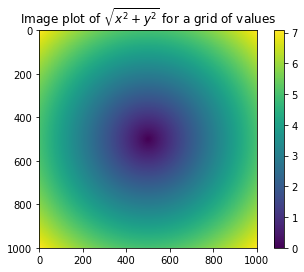

In [66]:
# visualzation: evaluate functions across a regular grid of values
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2+ys**2)
plt.imshow(z)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values");

### Linear Algebra

In [57]:
# Linear Algebra
from numpy.linalg import inv, qr, det, eig, svd, solve, lstsq
# Context manager for setting print options
np.set_printoptions(precision=2, suppress=True)

X = np.random.randn(5, 5)
mat = X.T.dot(X)
X, mat, inv(mat)

(array([[-0.53, -0.8 ,  1.08,  1.13, -0.93],
        [ 0.03, -1.9 ,  0.02, -1.01,  0.12],
        [-0.71, -2.19,  0.01, -0.84, -0.77],
        [ 0.32, -0.38, -0.88,  0.17,  0.27],
        [-0.76,  0.08,  0.97,  0.55, -0.75]]),
 array([[ 1.47,  1.74, -1.6 , -0.39,  1.7 ],
        [ 1.74,  9.16, -0.52,  2.83,  2.04],
        [-1.6 , -0.52,  2.87,  1.56, -1.98],
        [-0.39,  2.83,  1.56,  3.33, -0.9 ],
        [ 1.7 ,  2.04, -1.98, -0.9 ,  2.12]]),
 array([[ 45.04,   5.19,   1.45, -11.92, -44.89],
        [  5.19,   1.03,  -0.08,  -1.86,  -6.03],
        [  1.45,  -0.08,   1.38,  -0.4 ,   0.05],
        [-11.92,  -1.86,  -0.4 ,   4.1 ,  12.73],
        [-44.89,  -6.03,   0.05,  12.73,  47.79]]))

In [58]:
mat.dot(inv(mat))

array([[ 1.,  0., -0.,  0., -0.],
       [-0.,  1.,  0., -0.,  0.],
       [-0., -0.,  1.,  0.,  0.],
       [ 0., -0., -0.,  1.,  0.],
       [-0.,  0.,  0., -0.,  1.]])

In [59]:
q, r = qr(mat)
q, r

(array([[-0.45,  0.16, -0.55, -0.15, -0.67],
        [-0.53, -0.76,  0.24,  0.28, -0.09],
        [ 0.49, -0.36, -0.63,  0.48,  0.  ],
        [ 0.12, -0.48, -0.25, -0.81,  0.19],
        [-0.52,  0.19, -0.42,  0.11,  0.71]]),
 array([[-3.28, -6.62,  3.6 ,  0.29, -4.01],
        [ 0.  , -7.45, -2.03, -4.55,  0.28],
        [ 0.  ,  0.  , -0.62, -0.55,  0.14],
        [ 0.  ,  0.  ,  0.  , -1.18,  0.32],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.01]]))

In [60]:
np.trace(mat)

18.949092742094326

In [65]:
lambda_, x = eig(mat)
lambda_, x

(array([11.03,  6.6 ,  0.92,  0.01,  0.38]),
 array([[ 0.21, -0.34, -0.28, -0.68,  0.54],
        [ 0.9 ,  0.11,  0.35, -0.09, -0.21],
        [-0.11,  0.6 ,  0.46, -0.01,  0.64],
        [ 0.27,  0.55, -0.76,  0.19,  0.08],
        [ 0.24, -0.45, -0.02,  0.7 ,  0.49]]))

### Pseudorandom Number Generation

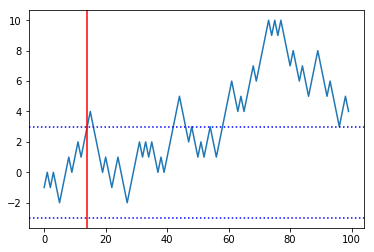

In [99]:
# random walk
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(walk[:100]);
# first crossing time: the step at which the random walk reaches a particular value
idx = (np.abs(walk) >= 3).argmax()
ax.axhline(y=3, color='b', ls=':')
ax.axhline(y=-3, color='b', ls=':')
ax.axvline(x=idx, color='r')

### Advanced Array Manipulation

In [146]:
arr = np.arange(16)
arr.reshape((8, -1))

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15]])

In [133]:
arr.ravel('F')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [157]:
arr1, arr2, arr3, arr4 = np.split(arr, [4, 8, 12])

In [141]:
np.concatenate([arr1, arr2], axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [158]:
arr1, arr2, arr3, arr4

(array([0, 1, 2, 3]),
 array([4, 5, 6, 7]),
 array([ 8,  9, 10, 11]),
 array([12, 13, 14, 15]))

### Broadcasting

In [162]:
arr = np.random.randn(4,3)
arr

array([[-2.62, -0.41, -0.66],
       [ 0.55,  2.06, -1.08],
       [ 0.54, -0.89, -0.64],
       [ 0.69, -0.89, -1.21]])

In [163]:
arr.mean(0), arr.mean(1)

(array([-0.21, -0.03, -0.9 ]), array([-1.23,  0.51, -0.33, -0.47]))

In [165]:
demeaned = arr - arr.mean(0)
demeaned, demeaned.mean(0)

(array([[-2.41, -0.38,  0.23],
        [ 0.76,  2.09, -0.18],
        [ 0.75, -0.85,  0.26],
        [ 0.9 , -0.86, -0.32]]), array([ 0., -0.,  0.]))

- Broadcasting over other axes

The broadcasting dimensions must be 1 in the smaller array.

In [169]:
row_means = arr.mean(1)
row_means.reshape((4,1))

array([[-1.23],
       [ 0.51],
       [-0.33],
       [-0.47]])

In [170]:
demeaned = arr - row_means.reshape((4,1))
demeaned.mean(1)

array([ 0.,  0.,  0., -0.])

In [175]:
row_means.shape, row_means[:, np.newaxis].shape

((4,), (4, 1))

In [176]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)
    indexer = [slice(None)]*arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]

- Setting Array Values by Broadcasting

In [178]:
arr = np.zeros((4,3))
arr[:] = 5
arr

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [179]:
col = np.array([0, 1, 2, 3])
arr[:] = col[:, np.newaxis]
arr

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])